<a href="https://colab.research.google.com/github/cedricxs/MYPY/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1-  Regression Curves


#Scatter plot vizualization

In [0]:
data=read.table("1000.data", header=T)

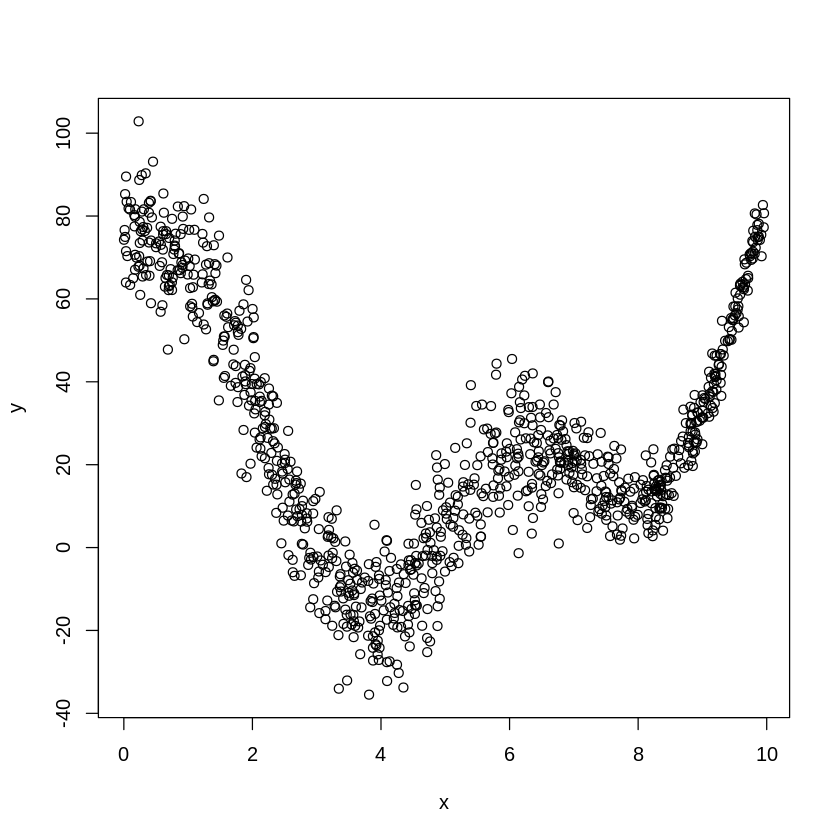

In [0]:
plot(data)

#Function polynReg

In [0]:
polynReg <- function(degree, color, nbpoints = 20) {
  apprentissage<-data[sample(nrow(data), size=nbpoints),]
  model = lm(y~poly(x, degree, raw=TRUE), apprentissage)
  newdata = data.frame(
    x=data$x
  )
  lines(data$x, predict(model, newdata=newdata), col=color)
}

In [0]:
#test
polynReg(1, "red")

ERROR: ignored

# Fonction polyRepeat

In [0]:
polynRepeat<-function(degree, nbPoints=20, nbRepeats=10){
  plot(data, main=paste('Linear regression degree ',degree))
  rand_color<-rainbow(nbRepeats)
  for (val in 1:nbRepeats) {
    polynReg(degree, rand_color[val], nbPoints)
  }
}

ERROR: ignored

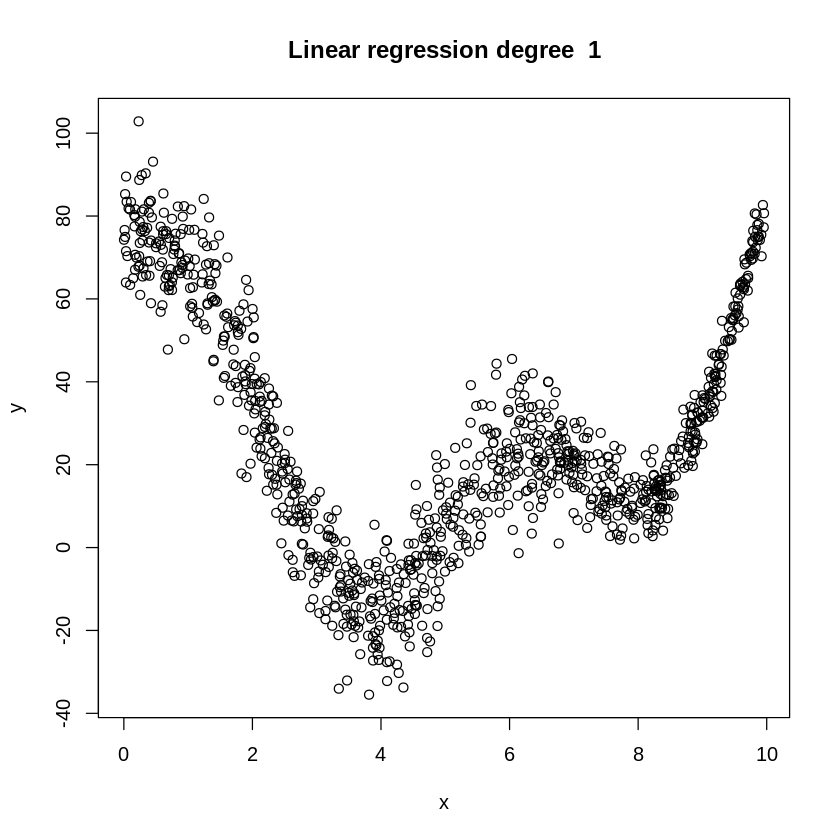

In [0]:
polynRepeat(1, 20)
polynRepeat(2, 20)
polynRepeat(3, 20)
polynRepeat(4, 20)
polynRepeat(5, 20)
polynRepeat(6, 20)
polynRepeat(7, 20)
polynRepeat(8, 20)
polynRepeat(9, 20)

##2- Precision and accuracy

#poly

In [0]:
polynome<-function(degree, nbPoints=20) {
  apprentissage<-data[sample(nrow(data), size=nbPoints),]
  model = lm(y~poly(x, degree, raw=TRUE), apprentissage)
  newdata = data.frame(
    x=apprentissage$x
  )
  return (model=model, y=apprentissage$y, Y=predict(model, newdata=newdata))
}

In [0]:
polynome(1)

ERROR: ignored

#MAE

In [0]:
mae<-function(n, y, Y) {
  return (sum(abs(y - Y))/n)
}

#polynMeasure

In [0]:
polynMeasure<-function(degree, nbPoints=20){
  accuracy = vector()
  precision = vector()
  for (epoch in 1:1000){
    polynome = polynome(degree, nbPoints)
    model = polynome$model
    y = polynome$y
    Y = polynome$Y
    accuracy <- vector(accuracy, mae(nbPoints, y, Y))

    newdataAccuracy = data.frame(
      x=data$x
    )
    precision <- vector(precision, mae(nrow(data), data$y, predict(model, newdataAccuracy)))
  }
  print(mean(accuracy))
  print(mean(precision))
}

In [0]:
# Test
polynMeasure(1)